# Before you begin

## Update your course repository

You need to clone the course repository to Nova. You probably already have cloned this, so you can skip this step.

```bash
git clone git@github.com:EEOB-BioData/BCB546_Spring2024.git
```

You will still need to pull new changes to this repository at the beginning of class. This will enable you to access new data files and scripts needed for in-class activities.

```bash
cd BCB546_Spring2024
git pull
```

Note that if you have modified any files in the repository, you will need to commit those changes before you can pull new changes. If you don't care about the changes, just delete and re-clone the repository.

## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Getting Started

To being with, we will need to load the `pandas` library. This library will provide us with the tools we need to work with dataframes.


In [1]:
import pandas as pd

Often times, we will also need other libraries to help us with our data analysis. For example, we may need to use the `numpy` library when working with arrays or `os` module when working with files. We can import these libraries as follows:

In [2]:
import numpy as np
import os

With `os` module you can get the current working directory using the following command:

In [3]:
os.getcwd()

'/work/LAS/mhufford-lab/arnstrm/EEOB546/BCB546_Spring2024/course-files/python'

This will return the current working directory as a string. `os` also allows you to construct bash commands and execute them using `os.system()`. For example, to list the files in the current working directory, you can use the following command:


In [4]:
os.system('ls')

01-introduction-to-pandas.ipynb
01-introduction-to-pandas.md
02-pandas-for-manipulating-gff3.ipynb
02-pandas-for-manipulating-gff3.md
03-introduction-to-seaborn.ipynb
03-introduction-to-seaborn.md
04A-seaborn-deseq-plotting.ipynb
04B-seaborn-gff3-plotting.ipynb
04C-seaborn-tsv-plotting.ipynb
05-biopython-hands-on.ipynb
a8
B73v5_mRNA.bed
blast_output.xml
deseq2_plotting.ipynb
DESeq2results-KOvsWT.tsv
gc_percent.ipynb
gene_feature_length_distribution.png
gff3.ipynb
gff3_manipulation.ipynb
heatmap.png
in-class_part1.ipynb
maize_mRNA.csv
obsolete
output.fasta
species.csv
summary_stats.csv
surveys_complete.csv
surveys.csv
tb1_zm_aligned.fasta
tb1_zm.fasta
test.aln
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled.ipynb
volcano_plot.png
Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3
zm_dna.fasta
zm_pep.fasta


0

or

In [5]:
cmd = 'ls' # you can construct more complex commands this way
os.system(cmd)

01-introduction-to-pandas.ipynb
01-introduction-to-pandas.md
02-pandas-for-manipulating-gff3.ipynb
02-pandas-for-manipulating-gff3.md
03-introduction-to-seaborn.ipynb
03-introduction-to-seaborn.md
04A-seaborn-deseq-plotting.ipynb
04B-seaborn-gff3-plotting.ipynb
04C-seaborn-tsv-plotting.ipynb
05-biopython-hands-on.ipynb
a8
B73v5_mRNA.bed
blast_output.xml
deseq2_plotting.ipynb
DESeq2results-KOvsWT.tsv
gc_percent.ipynb
gene_feature_length_distribution.png
gff3.ipynb
gff3_manipulation.ipynb
heatmap.png
in-class_part1.ipynb
maize_mRNA.csv
obsolete
output.fasta
species.csv
summary_stats.csv
surveys_complete.csv
surveys.csv
tb1_zm_aligned.fasta
tb1_zm.fasta
test.aln
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled.ipynb
volcano_plot.png
Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3
zm_dna.fasta
zm_pep.fasta


0

There are other ways to run bash commands as well (magic commands, or with `!`), but `os` is a good way to do it programmatically and is easier to use when you need to construct more complex commands.


# Data Structures

The primary data structure in `pandas` is the `DataFrame`. This is a two-dimensional table with rows and columns. You can create a `DataFrame` from a dictionary, a list of dictionaries, a list of lists, or a numpy array.


In [6]:
# Create a DataFrame from a dictionary
data = {'name': ['John', 'Anna', 'Peter', 'Linda'],
        'age': [23, 36, 32, 45],
        'city': ['New York', 'Paris', 'Berlin', 'London']}
df = pd.DataFrame(data)
print(df)

    name  age      city
0   John   23  New York
1   Anna   36     Paris
2  Peter   32    Berlin
3  Linda   45    London


You can also create a `DataFrame` from a list of dictionaries. This is useful when you have data that is not in a tabular format.

In [7]:
data = [{'name': 'John', 'age': 23, 'city': 'New York'},
        {'name': 'Anna', 'age': 36, 'city': 'Paris'},
        {'name': 'Peter', 'age': 32, 'city': 'Berlin'},
        {'name': 'Linda', 'age': 45, 'city': 'London'}]
df = pd.DataFrame(data)
print(df)

    name  age      city
0   John   23  New York
1   Anna   36     Paris
2  Peter   32    Berlin
3  Linda   45    London


# Our data

For this lesson, we will be using the Portal Teaching data, a subset of the data from the ecological study by Ernst et al. (2009): [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal](http://www.esapubs.org/archive/ecol/E090/118/default.htm), Arizona, USA Specifically, we will be using files from the [Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459).

This section will use the surveys.csv file that can be downloaded from the `course-files/python` folder of the course repository. Pull from the course repository and change to to course-files/python or copy the surveys.csv file to the directory from which you would like to work.

In this lesson, we are studying the species and weight of (vertebrate) animals captured in plots in our study area. The observed data are stored as a `.csv` file (comma-separated value): each row holds information for a single animal, and the columns represent:



## Reading data

To read the data from the `surveys.csv` file, we can use the `read_csv` function from `pandas`.


In [8]:
surveys_df = pd.read_csv('surveys.csv')

You can view the contents of the dataframe

In [9]:
print(surveys_df) # or just type the variable name `surveys_df`

       record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0              1      7   16  1977        2         NL    M             32.0   
1              2      7   16  1977        3         NL    M             33.0   
2              3      7   16  1977        2         DM    F             37.0   
3              4      7   16  1977        7         DM    M             36.0   
4              5      7   16  1977        3         DM    M             35.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
35544      35545     12   31  2002       15         AH  NaN              NaN   
35545      35546     12   31  2002       15         AH  NaN              NaN   
35546      35547     12   31  2002       10         RM    F             15.0   
35547      35548     12   31  2002        7         DO    M             36.0   
35548      35549     12   31  2002        5        NaN  NaN              NaN   

       weight  
0         NaN  
1      

## Basic information about the data

To get basic information about the data, you can use the `info()` method.


In [10]:
surveys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        35549 non-null  int64  
 1   month            35549 non-null  int64  
 2   day              35549 non-null  int64  
 3   year             35549 non-null  int64  
 4   plot_id          35549 non-null  int64  
 5   species_id       34786 non-null  object 
 6   sex              33038 non-null  object 
 7   hindfoot_length  31438 non-null  float64
 8   weight           32283 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB


This will return the number of rows and columns, the column names, the number of non-null values in each column, and the data type of each column.

`type`, `dtypes` and `shape` are also useful attributes to get information about the data.

In [11]:
type(surveys_df)
surveys_df.dtypes
surveys_df.shape

(35549, 9)

To look at just the columns of a DataFrame, you can use the `columns` attribute.

In [12]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

similiarly, you can look at the index of the DataFrame using the `index` attribute.

In [13]:
surveys_df.index

RangeIndex(start=0, stop=35549, step=1)

other useful options include `head()` and `tail()` methods to view the first and last few rows of the DataFrame.

In [14]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [15]:
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


## Selecting data

You can select data from a DataFrame using the `iloc` method. This method allows you to select rows and columns by their integer index.

Select first row


In [16]:
surveys_df.iloc[0]

record_id             1
month                 7
day                  16
year               1977
plot_id               2
species_id           NL
sex                   M
hindfoot_length    32.0
weight              NaN
Name: 0, dtype: object

select the first 5 rows

In [17]:
surveys_df.iloc[0:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


select the first 5 rows and the first 3 columns

In [18]:
surveys_df.iloc[0:5, 0:3]

,record_id,month,day
0,1,7,16
1,2,7,16
2,3,7,16
3,4,7,16
4,5,7,16


You can also select data using the column names. This can be done using the `loc` method.

In [19]:
surveys_df.loc[0:5, ['species_id', 'record_id', 'hindfoot_length']]

,species_id,record_id,hindfoot_length
0,NL,1,32.0
1,NL,2,33.0
2,DM,3,37.0
3,DM,4,36.0
4,DM,5,35.0
5,PF,6,14.0


You can also select data based on conditions. For example, to select all rows where the `species_id` is equal to `NL`, you can use the following command:

In [20]:
surveys_df[surveys_df['species_id'] == 'NL']

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
21,22,7,17,1977,15,NL,F,31.0,NaN
37,38,7,17,1977,17,NL,M,33.0,NaN
71,72,8,19,1977,2,NL,M,31.0,NaN
...,...,...,...,...,...,...,...,...,...
35403,35404,12,29,2002,2,NL,F,30.0,NaN
35414,35415,12,29,2002,12,NL,F,33.0,200.0
35434,35435,12,29,2002,18,NL,F,31.0,150.0
35458,35459,12,29,2002,20,NL,F,29.0,148.0


You can also combine conditions using `&` (and) and `|` (or). For example, to select all rows where the `species_id` is equal to `NL` and the `sex` is equal to `M`, you can use the following command:

In [21]:
surveys_df[(surveys_df['species_id'] == 'NL') & (surveys_df['sex'] == 'M')]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
37,38,7,17,1977,17,NL,M,33.0,NaN
71,72,8,19,1977,2,NL,M,31.0,NaN
587,588,2,18,1978,2,NL,M,NaN,218.0
...,...,...,...,...,...,...,...,...,...
34863,34864,10,5,2002,24,NL,M,28.0,194.0
34990,34991,11,9,2002,2,NL,M,33.0,238.0
35211,35212,12,7,2002,2,NL,M,33.0,248.0
35283,35284,12,7,2002,24,NL,M,35.0,225.0


Let's get a list of all the species. The pd.unique method tells us all of the unique values in the `species_id` column. These are two-character identifiers of the species names (e.g., NL represents the rodent _Neotoma albigula_).

In [22]:
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

# Practice questions:

1. Select unique `plot_id` values.
2. Select all rows where the `weight` is greater than 50.
3. Select all rows where the `weight` is greater than 50 and the `species_id` is equal to `NL`.
4. `nunique()` is a useful method to get the number of unique values in a column. Use this method to get the number of unique `species_id` values.


# Groups in pandas

We often want to calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the average weight of all individuals per plot.

We can calculate basic statistics for all records in a single column using the .describe() method:

In [23]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract one or more columns from the DataFrame and calculate the mean weight per plot.


In [24]:
surveys_df.groupby('plot_id')['weight'].mean()

plot_id
1     51.822911
2     52.251688
3     32.654386
4     47.928189
5     40.947802
6     36.738893
7     20.663009
8     47.758001
9     51.432358
10    18.541219
11    43.451757
12    49.496169
13    40.445660
14    46.277199
15    27.042578
16    24.585417
17    47.889593
18    40.005922
19    21.105166
20    48.665303
21    24.627794
22    54.146379
23    19.634146
24    43.679167
Name: weight, dtype: float64

We can also calculate multiple summary statistics at once using the `agg` method.

In [25]:
surveys_df.groupby('plot_id')['weight'].agg(['mean', 'median', 'std'])

,mean,median,std
plot_id,,,
1,51.822911,44.0,38.176670
2,52.251688,41.0,46.503602
3,32.654386,23.0,35.641630
4,47.928189,43.0,32.886598
5,40.947802,37.0,34.086616
6,36.738893,30.0,30.648310
7,20.663009,17.0,21.315325
8,47.758001,44.0,33.192194
9,51.432358,45.0,33.724726


Other main statistics that can be calculated include `count`, `sum`, `min`, `max`, `std`, `var`, `sem`, `skew`, `kurt`, `quantile`, `cumsum`, `cumprod`, `cummax`, `cummin`.


You can also group by multiple columns.


In [26]:
surveys_df.groupby(['species_id', 'sex'])['weight'].mean()

species_id  sex
AH          M             NaN
BA          F        9.161290
            M        7.357143
DM          F       41.609685
            M       44.353134
DO          F       48.531250
            M       49.135102
DS          F      117.749548
            M      122.290984
NL          F      154.282209
            M      165.652893
OL          F       31.065817
            M       32.068410
OT          F       24.830904
            M       23.695382
OX          F       21.000000
            M       21.000000
PB          F       30.210884
            M       33.816498
PE          F       22.822183
            M       20.584906
PF          F        7.974394
            M        7.885287
PH          F       30.850000
            M       31.454545
PI          M       19.428571
PL          F       19.312500
            M       18.684211
PM          F       22.125668
            M       20.801205
PP          F       17.180670
            M       17.184486
PX          F       20.0


Or, we can also count just the rows that have the species “PL” (_Peromyscus leucopus_):



# Practice questions:

1. Using the .describe() method on the DataFrame sorted by sex, determine how many individuals were observed for each.
2. Use `groupby` method to group 2 columns `['plot_id','sex']` and calculate the mean of the `weight` column.


# Column operations


You can add a new column to a DataFrame by assigning a value to a new column name. For example, to add a new column `weight_kg` that contains the weight in kilograms, you can use the following command:


In [27]:
surveys_df['weight_kg'] = surveys_df['weight'] / 1000

Inspect the DataFrame to see the new column.

In [28]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN


Or check the stats of the new column.

In [29]:
surveys_df['weight_kg'].describe()

count    32283.000000
mean         0.042672
std          0.036631
min          0.004000
25%          0.020000
50%          0.037000
75%          0.048000
max          0.280000
Name: weight_kg, dtype: float64


# Practice questions:

1. Add a new column `hindfoot_cm` that contains the hindfoot length in centimeters.
2. Calculate the mean of the `hindfoot_cm` column grouped by `species_id` and `sex`.

# Missing data

To check for missing data, you can use the `isnull()` method.


In [30]:
surveys_df.isnull()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,True,True
35545,False,False,False,False,False,False,True,True,True,True
35546,False,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False,False


To count the number of missing values in each column, you can use the `isnull()` method followed by the `sum()` method.


In [31]:
surveys_df.isnull().sum()

record_id             0
month                 0
day                   0
year                  0
plot_id               0
species_id          763
sex                2511
hindfoot_length    4111
weight             3266
weight_kg          3266
dtype: int64

To drop rows with missing data, you can use the `dropna()` method.

In [32]:
surveys_df.dropna()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
62,63,8,19,1977,3,DM,M,35.0,40.0,0.040
63,64,8,19,1977,7,DM,M,37.0,48.0,0.048
64,65,8,19,1977,4,DM,F,34.0,29.0,0.029
65,66,8,19,1977,4,DM,F,35.0,46.0,0.046
66,67,8,19,1977,7,DM,M,35.0,36.0,0.036
...,...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0,0.031
35541,35542,12,31,2002,15,PB,F,26.0,29.0,0.029
35542,35543,12,31,2002,15,PB,F,27.0,34.0,0.034
35546,35547,12,31,2002,10,RM,F,15.0,14.0,0.014


To fill missing data with a specific value, you can use the `fillna()` method.

In [33]:
surveys_df.fillna(0)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
0,1,7,16,1977,2,NL,M,32.0,0.0,0.000
1,2,7,16,1977,3,NL,M,33.0,0.0,0.000
2,3,7,16,1977,2,DM,F,37.0,0.0,0.000
3,4,7,16,1977,7,DM,M,36.0,0.0,0.000
4,5,7,16,1977,3,DM,M,35.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,0,0.0,0.0,0.000
35545,35546,12,31,2002,15,AH,0,0.0,0.0,0.000
35546,35547,12,31,2002,10,RM,F,15.0,14.0,0.014
35547,35548,12,31,2002,7,DO,M,36.0,51.0,0.051



# Practice questions:

1. Drop all rows with missing data and save the result to a new DataFrame.

# Exporting data

To export a DataFrame to a CSV file, you can use the `to_csv()` method.

In [34]:
surveys_df.to_csv('surveys_clean.csv', index=False)

This will save the DataFrame to a file called `surveys_clean.csv` without the index column.


# Plotting

You can plot data from a DataFrame using the `plot()` method. For example, to plot the mean weight per plot, you can use the following command:

In [35]:
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_data = by_plot_sex['weight'].mean()
plot_data

plot_id  sex
1        F      46.311138
         M      55.950560
2        F      52.561845
         M      51.391382
3        F      31.215349
         M      34.163241
4        F      46.818824
         M      48.888119
5        F      40.974806
         M      40.708551
6        F      36.352288
         M      36.867388
7        F      20.006135
         M      21.194719
8        F      45.623011
         M      49.641372
9        F      53.618469
         M      49.519309
10       F      17.094203
         M      19.971223
11       F      43.515075
         M      43.366197
12       F      49.831731
         M      48.909710
13       F      40.524590
         M      40.097754
14       F      47.355491
         M      45.159378
15       F      26.670236
         M      27.523691
16       F      25.810427
         M      23.811321
17       F      48.176201
         M      47.558853
18       F      36.963514
         M      43.546952
19       F      21.978599
         M      20.306878

This calculates the sums of weights for each sex within each plot as a table

To plot:

<Axes: xlabel='plot_id,sex'>

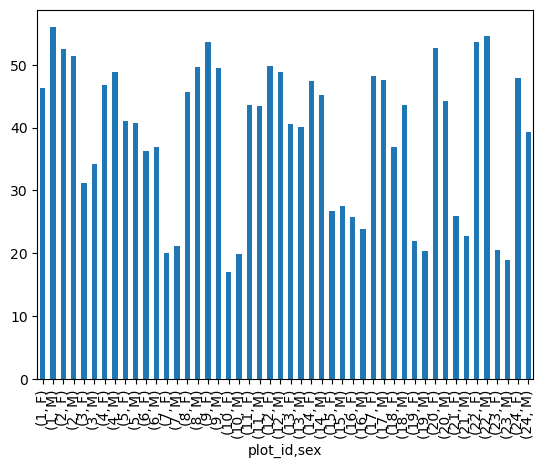

In [36]:
plot_data.plot(kind='bar')

We can reshape the data using unstack to separate `M` and `F` values into separate columns.

In [37]:
plot_data_unstack = plot_data.unstack()
plot_data_unstack

sex,F,M
plot_id,,
1,46.311138,55.950560
2,52.561845,51.391382
3,31.215349,34.163241
4,46.818824,48.888119
5,40.974806,40.708551
6,36.352288,36.867388
7,20.006135,21.194719
8,45.623011,49.641372
9,53.618469,49.519309


Now we can plot the data.

<Axes: xlabel='plot_id'>

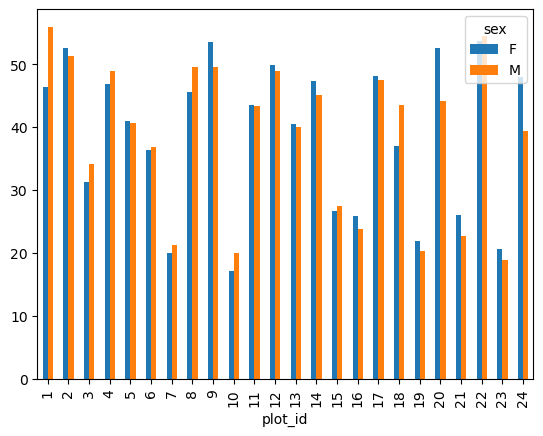

In [38]:
plot_data_unstack.plot(kind='bar')

a bit refined plot:

Text(0.5, 1.0, 'Mean weight by plot')

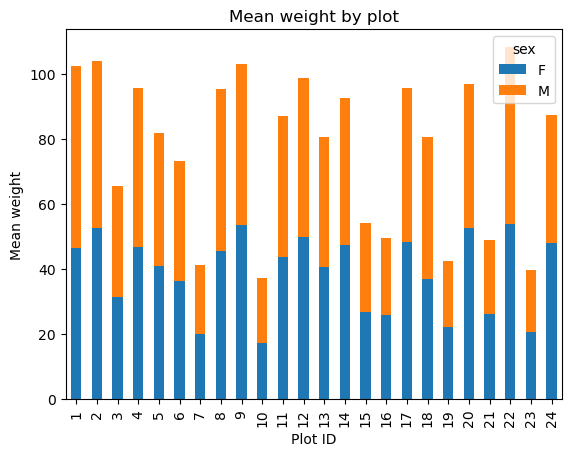

In [39]:
stkplot = plot_data_unstack.plot(kind='bar', stacked=True)
stkplot.set_ylabel("Mean weight")
stkplot.set_xlabel("Plot ID")
stkplot.set_title("Mean weight by plot")

# Practice take home questions (not graded):

Continue working with the surveys_df DataFrame on the following challenges:

1. Plot the average weight over all species and plots sampled each year (i.e., year on the horizontal axis and average weight on the vertical axis).

2. Come up with another way to view and/or summarize the observations in this dataset. What do you learn from this?

Feel free to use the `#scripting_help` channel in Slack to discuss these exercises.